In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:
data2013 = pd.read_excel('C:/Users/ANIKET GAIKWAD/Desktop/2013.xlsx')

In [3]:
data2013.head(10)

,Station,BJP,BSP,INC,SP,AAP,IC,valid,test,nota,tendered,Year,WINNER
0,1,243,8,136,0,348,0,735,0,6,0,2013,AAP
1,2,210,10,142,5,337,2,706,0,2,0,2013,AAP
2,3,297,2,102,7,325,2,735,0,7,0,2013,AAP
3,4,183,4,83,1,348,2,621,0,1,0,2013,AAP
4,5,223,2,96,3,387,1,712,0,0,0,2013,AAP
5,6,150,18,142,3,397,1,711,0,2,0,2013,AAP
6,7,74,0,64,1,252,2,393,0,2,0,2013,AAP
7,8,148,8,58,2,253,0,469,0,2,0,2013,AAP
8,9,165,13,223,5,465,6,877,0,6,0,2013,AAP
9,10,148,0,183,3,381,4,719,0,7,0,2013,AAP


In [4]:
data2015 = pd.read_excel('C:/Users/ANIKET GAIKWAD/Desktop/2015.xlsx')
data2015.head()

,Station,BSP,BJP,NCP,INC,AAP,SPP,SS,IC,valid,rejected,NOTA,tendered,year,Winner
0,1,3,435,0,51,491,2,0,1,983,0,8,0,2015,AAP
1,2,3,221,1,41,490,3,0,2,761,0,4,0,2015,AAP
2,3,0,361,1,43,414,0,1,2,822,0,6,0,2015,AAP
3,4,2,255,1,29,409,1,0,1,698,0,1,0,2015,AAP
4,5,0,345,1,51,434,0,0,0,831,0,1,0,2015,AAP


In [5]:
data2008= pd.read_excel('C:/Users/ANIKET GAIKWAD/Desktop/2008.xlsx')
data2008.head(11)

,party,candidate,votes,percentage
0,BJP,Vijay Kumar Malhotra,42197,52.942800
1,INC,Jitender Kumar Kocher,30979,38.868048
2,BSP,Rajendra Kumar Gupta,4485,5.627141
3,SS,Raju,676,0.848149
4,BPC,Jitendar Kumar Gupta,321,0.402745
5,IC,Harish Bhardwaj,317,0.397727
6,SP,Neelam Saxena,219,0.274770
7,BPD,Surya Prakash Loonker,180,0.225838
8,IC,Chander Kala,173,0.217056
9,NSCP,Rai Anoop Prasad,80,0.100373


In [6]:
data2014= pd.read_excel('C:/Users/ANIKET GAIKWAD/Desktop/20141.xlsx')
data2014.head()

,Station,INC,AAP,BJP,valid,rejected,NOTA,tendered,WINNER
0,1,180,226,553,976,0,14,0,BJP
1,2,120,182,341,691,0,1,0,BJP
2,3,95,139,482,741,0,4,0,BJP
3,4,90,137,363,615,0,2,0,BJP
4,5,97,154,475,763,0,2,0,BJP


# DATA ANALYSIS : 2008 VIDHAN SABHA ELECTIONS(GREATER KAILASH,DELHI)

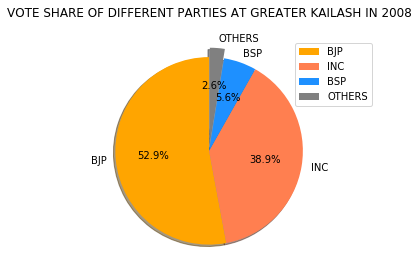

In [7]:
labels = 'BJP','INC','BSP','OTHERS'
sizes = [42197,30979,4485,2042]
colors = ['orange','coral','dodgerblue','grey']
explode = (0,0,0,0.1)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.title('VOTE SHARE OF DIFFERENT PARTIES AT GREATER KAILASH IN 2008\n')
plt.axis('equal')
plt.show()

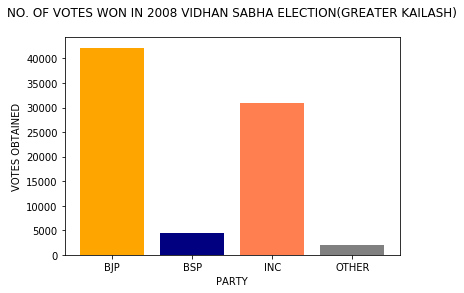

In [8]:
a = [['BJP',42197],['BSP',4485],['INC',30979],['OTHER',2042]]
vote = pd.DataFrame(a,columns =['Party','Votes'])
my_colors = ['orange','navy','coral','grey']  

plt.title("NO. OF VOTES WON IN 2008 VIDHAN SABHA ELECTION(GREATER KAILASH)\n",color='black')
plt.xlabel("PARTY",color='black')
plt.ylabel("VOTES OBTAINED",color='black')

x = vote['Party']
y = vote['Votes']
plt.bar(x,y,color = my_colors)
plt.show()

# DATA ANAYSIS : 2013 VIDHAN SABHA ELECTIONS(GREATER KAILASH,DELHI)


## PERCENTAGE OF VOTERS IN 2013: 

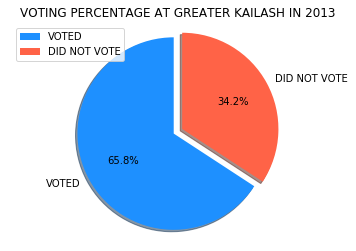

In [9]:
labels = 'VOTED','DID NOT VOTE'
sizes = [94581,49192]
colors = ['dodgerblue','tomato']
explode = (0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.title('VOTING PERCENTAGE AT GREATER KAILASH IN 2013')
plt.axis('equal')
plt.show()

## TOTAL VOTES IN 2013: 

In [10]:
print('TOTAL NO. OF VOTES')
print('BJP',data2013['BJP'].sum())
print('BSP',data2013['BSP'].sum())
print('INC',data2013['INC'].sum())
print('SP',data2013['SP'].sum())
print('AAP',data2013['AAP'].sum())
print('IC',data2013['IC'].sum())
a = [['BJP',data2013['BJP'].sum()],['BSP',data2013['BSP'].sum()],['INC',data2013['INC'].sum()],['SP',data2013['SP'].sum()],['AAP',data2013['AAP'].sum()],['IC',data2013['IC'].sum()]]
vote = pd.DataFrame(a,columns =['Party','Votes'])

TOTAL NO. OF VOTES
BJP 29897
BSP 900
INC 19641
SP 425
AAP 42924
IC 426


In [11]:
vote.head(6)

,Party,Votes
0,BJP,29897
1,BSP,900
2,INC,19641
3,SP,425
4,AAP,42924
5,IC,426


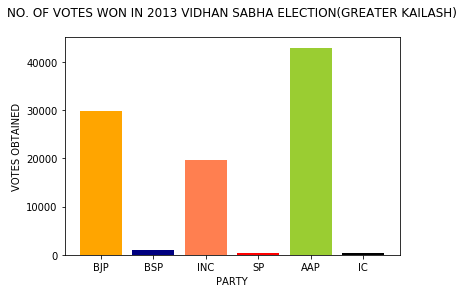

In [12]:
my_colors = ['orange','navy','coral','r','yellowgreen','black']  

plt.title("NO. OF VOTES WON IN 2013 VIDHAN SABHA ELECTION(GREATER KAILASH)\n",color='black')
plt.xlabel("PARTY",color='black')
plt.ylabel("VOTES OBTAINED",color='black')

x = vote['Party']
y = vote['Votes']
plt.bar(x,y,color = my_colors)
plt.show()

## VOTES THROUGH BALLOT PAPERS IN 2013: 

In [13]:
b = [['BJP','108'],['BSP','12'],['INC','73'],['SP','1'],['AAP','173'],['IC','1']]
voteballet = pd.DataFrame(b,columns =['Party','Votes'])

In [14]:
voteballet.head(6)

,Party,Votes
0,BJP,108
1,BSP,12
2,INC,73
3,SP,1
4,AAP,173
5,IC,1


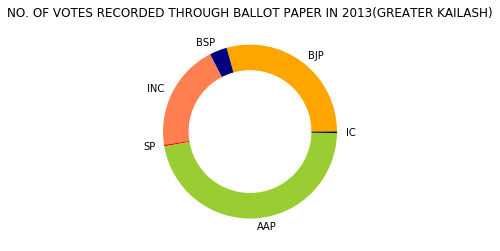

In [15]:
# create data
my_colors = ['orange','navy','coral','r','yellowgreen','black']  
names='BJP', 'BSP', 'INC', 'SP','AAP','IC'
size=[108,12,73,1,173,1]
plt.title("NO. OF VOTES RECORDED THROUGH BALLOT PAPER IN 2013(GREATER KAILASH)",color='black')
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=my_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## NO. OF SEATS WON IN 2013: 

In [16]:
data2013['WINNER'].value_counts()

AAP    123
BJP     25
INC      8
Name: WINNER, dtype: int64

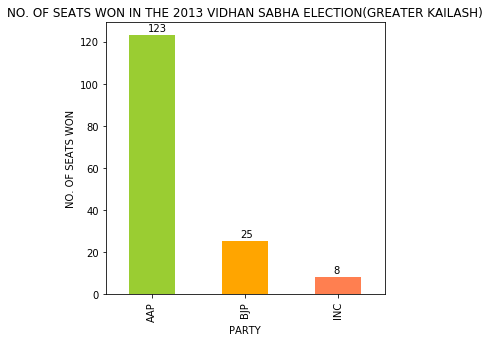

In [17]:
my_colors = ['yellowgreen','orange','coral']  

plt.title("NO. OF SEATS WON IN THE 2013 VIDHAN SABHA ELECTION(GREATER KAILASH)"
          ,color='black')
plt.xlabel("PARTY",color='black')
plt.ylabel("NO. OF SEATS WON",color='black')
plt.grid(True)
a = data2013['WINNER'].value_counts().plot("bar",figsize=(5,5),color = my_colors)
for p in a.patches:
    a.annotate(format(p.get_height()), (p.get_x()+.20, p.get_height()+2),fontsize=10)

plt.show()

## PERCENTAGE OF VOTES WON IN 2013: 

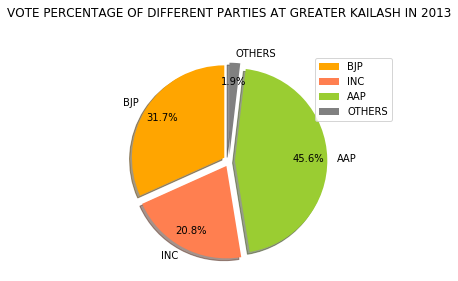

In [18]:
labels = 'BJP','INC','AAP','OTHERS'
sizes = [30005, 19714, 43097,1765]
colors = ['orange','coral','yellowgreen','grey']
explode = (0.05,0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('VOTE PERCENTAGE OF DIFFERENT PARTIES AT GREATER KAILASH IN 2013\n\n')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

# DATA ANALYSIS : 2014 LOK SABHA ELECTIONS(GREATER KAILASH,DELHI)

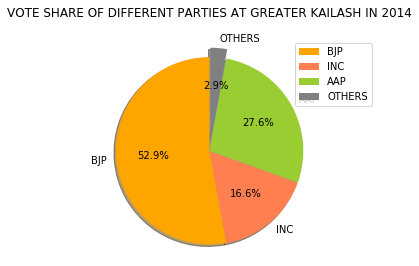

In [19]:
labels = 'BJP','INC','AAP','OTHERS'
sizes = [55200,17312,28829,2998]
colors = ['orange','coral','yellowgreen','grey']
explode = (0,0,0,0.1)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.title('VOTE SHARE OF DIFFERENT PARTIES AT GREATER KAILASH IN 2014\n')
plt.axis('equal')
plt.show()

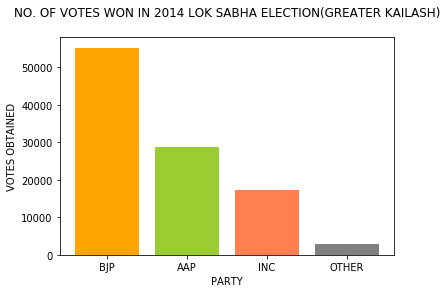

In [20]:
a = [['BJP',55200],['AAP',28829],['INC',17312],['OTHER',2998]]
vote = pd.DataFrame(a,columns =['Party','Votes'])
my_colors = ['orange','yellowgreen','coral','grey']  

plt.title("NO. OF VOTES WON IN 2014 LOK SABHA ELECTION(GREATER KAILASH)\n",color='black')
plt.xlabel("PARTY",color='black')
plt.ylabel("VOTES OBTAINED",color='black')

x = vote['Party']
y = vote['Votes']
plt.bar(x,y,color = my_colors)
plt.show()

# DATA ANALYSIS : 2015 VIDHAN SABHA ELECTION(GREATER KAILASH,NEW DELHI)

## PERCENTAGE OF VOTERS IN 2015:

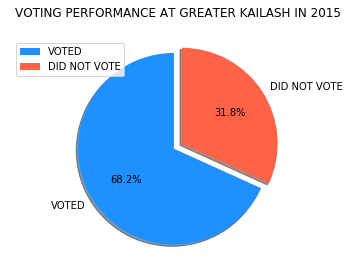

In [21]:
labels = 'VOTED','DID NOT VOTE'
sizes = [108037,50309]
colors = ['dodgerblue','tomato']
explode = (0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.title('VOTING PERFORMANCE AT GREATER KAILASH IN 2015\n')
plt.axis('equal')
plt.show()

##  TOTAL VOTES IN 2015:

In [22]:
print('TOTAL NO. OF VOTES')
print('BJP',data2015['BJP'].sum())
print('BSP',data2015['BSP'].sum())
print('INC',data2015['INC'].sum())
print('SP',data2015['SPP'].sum())
print('AAP',data2015['AAP'].sum())
print('IC',data2015['IC'].sum())
a = [['BJP',data2015['BJP'].sum()],['BSP',data2015['BSP'].sum()],['INC',data2015['INC'].sum()],['SPP',data2015['SPP'].sum()],
     ['AAP',data2015['AAP'].sum()],['IC',data2015['IC'].sum()],
     ['SS',data2015['SS'].sum()],['NCP',data2015['NCP'].sum()]]
vote = pd.DataFrame(a,columns =['Party','Votes'])

TOTAL NO. OF VOTES
BJP 42902
BSP 236
INC 6072
SP 238
AAP 57430
IC 228


In [23]:
vote.head(20)

,Party,Votes
0,BJP,42902
1,BSP,236
2,INC,6072
3,SPP,238
4,AAP,57430
5,IC,228
6,SS,75
7,NCP,115


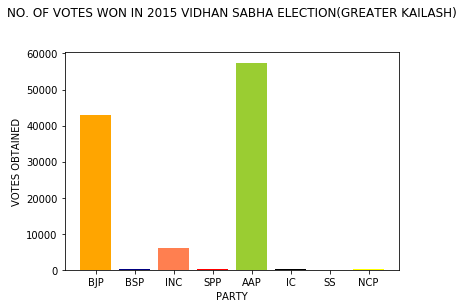

In [24]:
my_colors = ['orange','navy','coral','r','yellowgreen','black','dodgerblue','yellow']  

plt.title("NO. OF VOTES WON IN 2015 VIDHAN SABHA ELECTION(GREATER KAILASH)\n\n",color='black')
plt.xlabel("PARTY",color='black')
plt.ylabel("VOTES OBTAINED",color='black')
x = vote['Party']
y = vote['Votes']
plt.bar(x,y,color = my_colors)
plt.show()

##  VOTES THROUGH BALLOT PAPERS IN 2015: 

In [25]:
b1 = [['BJP','104'],['BSP','3'],['INC','30'],['IC','1'],['SPP','0'],['AAP','159'],['SS','1'],['NCP','1']]
voteballet = pd.DataFrame(b1,columns =['Party','Votes'])

In [26]:
voteballet.head(8)

,Party,Votes
0,BJP,104
1,BSP,3
2,INC,30
3,IC,1
4,SPP,0
5,AAP,159
6,SS,1
7,NCP,1


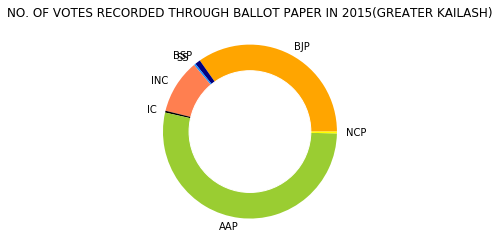

In [27]:
my_colors = ['orange','navy','dodgerblue','coral','black','yellowgreen','yellow']  
names='BJP','BSP','SS','INC','IC','AAP','NCP'
size=[104,3,1,30,1,159,1]
plt.title("NO. OF VOTES RECORDED THROUGH BALLOT PAPER IN 2015(GREATER KAILASH)",color='black')
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=my_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## NO. OF SEATS WON IN 2015:  

In [28]:
data2015['Winner'].value_counts()

AAP    94
BJP    62
Name: Winner, dtype: int64

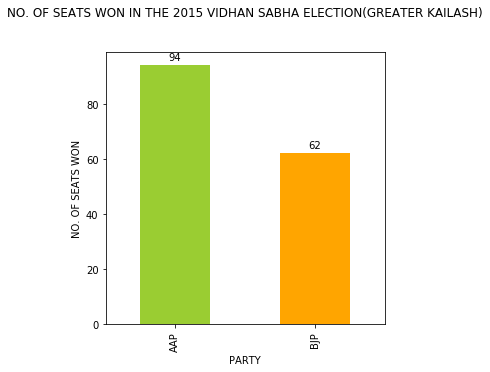

In [29]:
my_colors = ['yellowgreen','orange']  

plt.title("NO. OF SEATS WON IN THE 2015 VIDHAN SABHA ELECTION(GREATER KAILASH)\n\n"
          ,color='black')
plt.xlabel("PARTY",color='black')
plt.ylabel("NO. OF SEATS WON",color='black')
plt.grid(True)
a = data2015['Winner'].value_counts().plot("bar",figsize=(5,5),color = my_colors)
for p in a.patches:
    a.annotate(format(p.get_height()), (p.get_x()+.20, p.get_height()+2),fontsize=10)

plt.show()

## PERCENTAGE OF VOTES WON IN 2015: 

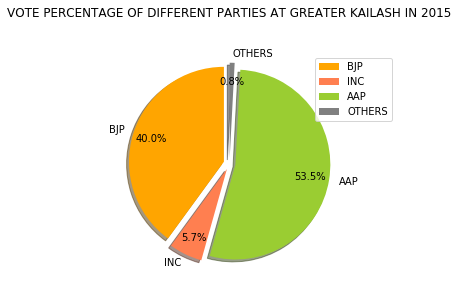

In [30]:
labels = 'BJP','INC','AAP','OTHERS'
sizes = [43006, 6102, 57589,897]
colors = ['orange','coral','yellowgreen','grey']
explode = (0.05,0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('VOTE PERCENTAGE OF DIFFERENT PARTIES AT GREATER KAILASH IN 2015\n\n')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

## USAGE OF NOTA (2013 VS 2014 VS 2015):  

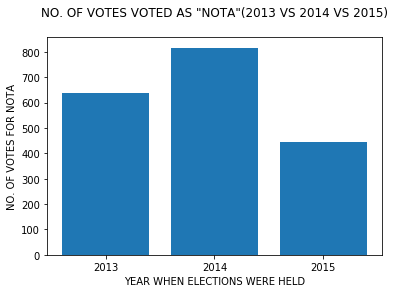

In [31]:
height = [636,816,443]
bars = ('2013','2014','2015')
plt.bar(bars, height)
plt.xticks(bars)
plt.xlabel('YEAR WHEN ELECTIONS WERE HELD')
plt.ylabel('NO. OF VOTES FOR NOTA')
plt.title('NO. OF VOTES VOTED AS "NOTA"(2013 VS 2014 VS 2015)\n')
plt.show()

# PARTY ANALYSIS : BHARATIYA JANATA PARTY (BJP) 

## NO. OF VOTES WON AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH(2013): 

In [32]:
diff1 = pd.DataFrame(data2013['valid']-data2013['BJP'],columns =['TOTAL VOTES'])
diff2 = pd.DataFrame(data2013['valid']-data2013['AAP'],columns =['TOTAL VOTES '])
diff3 = pd.DataFrame(data2013['valid']-data2013['INC'],columns =['TOTAL VOTES  '])
df_new = pd.concat([data2013, diff1,diff2,diff3], axis=1)
df_new.head()

,Station,BJP,BSP,INC,SP,AAP,IC,valid,test,nota,tendered,Year,WINNER,TOTAL VOTES,TOTAL VOTES,TOTAL VOTES
0,1,243,8,136,0,348,0,735,0,6,0,2013,AAP,492,387,599
1,2,210,10,142,5,337,2,706,0,2,0,2013,AAP,496,369,564
2,3,297,2,102,7,325,2,735,0,7,0,2013,AAP,438,410,633
3,4,183,4,83,1,348,2,621,0,1,0,2013,AAP,438,273,538
4,5,223,2,96,3,387,1,712,0,0,0,2013,AAP,489,325,616


##  NO. OF VOTES WON AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH(2014):

In [33]:
diff1a = pd.DataFrame(data2014['valid']-data2014['BJP'],columns =['TOTAL VOTES'])
diff2a = pd.DataFrame(data2014['valid']-data2014['AAP'],columns =['TOTAL VOTES '])
diff3a = pd.DataFrame(data2014['valid']-data2014['INC'],columns =['TOTAL VOTES  '])
df_newa = pd.concat([data2014, diff1a,diff2a,diff3a], axis=1)
df_newa.head()

,Station,INC,AAP,BJP,valid,rejected,NOTA,tendered,WINNER,TOTAL VOTES,TOTAL VOTES,TOTAL VOTES
0,1,180,226,553,976,0,14,0,BJP,423,750,796
1,2,120,182,341,691,0,1,0,BJP,350,509,571
2,3,95,139,482,741,0,4,0,BJP,259,602,646
3,4,90,137,363,615,0,2,0,BJP,252,478,525
4,5,97,154,475,763,0,2,0,BJP,288,609,666


## NO. OF VOTES WON AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH(2015):  

In [34]:
diff11 = pd.DataFrame(data2015['valid']-data2015['BJP'],columns =['TOTAL VOTES'])
diff22 = pd.DataFrame(data2015['valid']-data2015['AAP'],columns =['TOTAL VOTES '])
diff33 = pd.DataFrame(data2015['valid']-data2015['INC'],columns =['TOTAL VOTES  '])
df_new1 = pd.concat([data2015, diff11,diff22,diff33], axis=1)
df_new1.head()

,Station,BSP,BJP,NCP,INC,AAP,SPP,SS,IC,valid,rejected,NOTA,tendered,year,Winner,TOTAL VOTES,TOTAL VOTES,TOTAL VOTES
0,1,3,435,0,51,491,2,0,1,983,0,8,0,2015,AAP,548,492,932
1,2,3,221,1,41,490,3,0,2,761,0,4,0,2015,AAP,540,271,720
2,3,0,361,1,43,414,0,1,2,822,0,6,0,2015,AAP,461,408,779
3,4,2,255,1,29,409,1,0,1,698,0,1,0,2015,AAP,443,289,669
4,5,0,345,1,51,434,0,0,0,831,0,1,0,2015,AAP,486,397,780


# 2013:

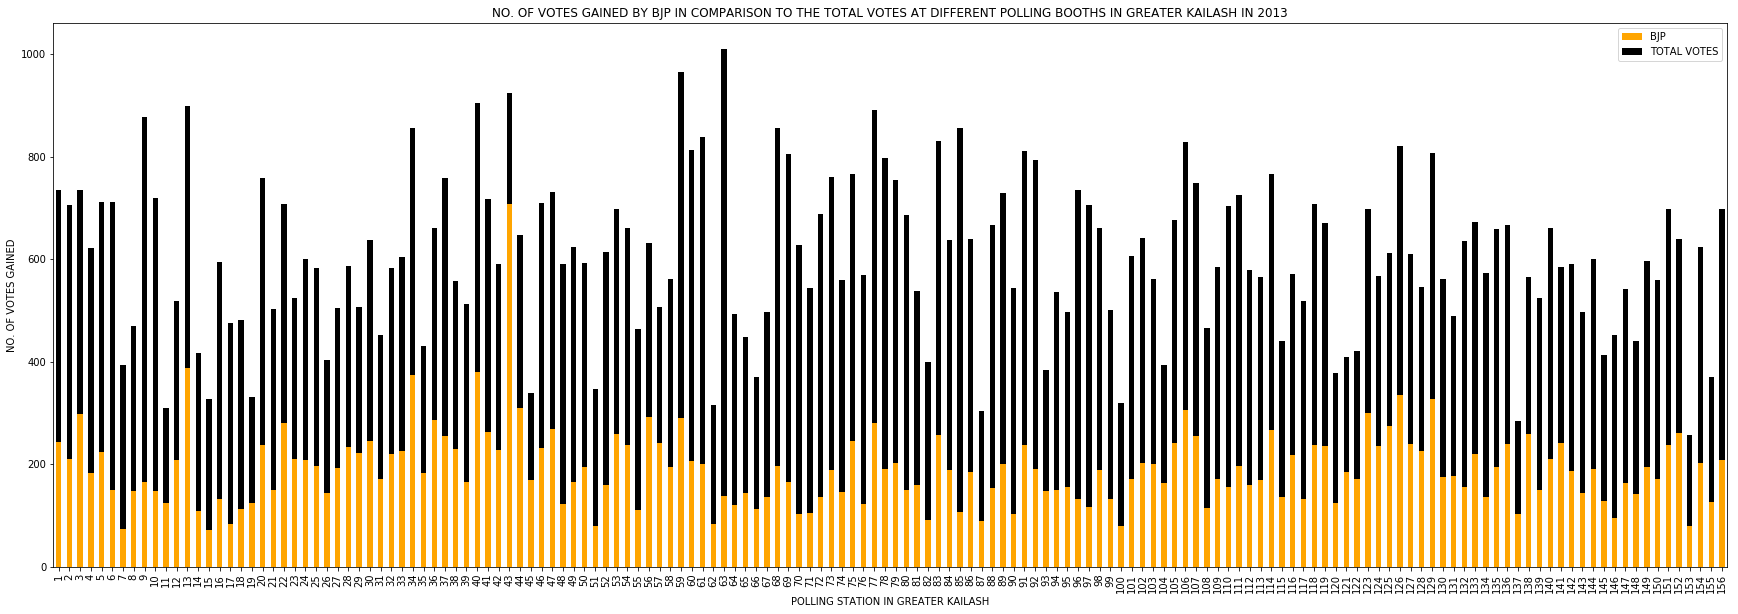

In [35]:
az= df_new[['BJP','TOTAL VOTES','Station']]
y= az.set_index('Station')
z=y.groupby('Station').mean()
z.plot.bar(stacked=True,figsize=(30,10),color = ('orange','black'))
plt.title('NO. OF VOTES GAINED BY BJP IN COMPARISON TO THE TOTAL VOTES AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH IN 2013')
plt.xlabel('POLLING STATION IN GREATER KAILASH')
plt.ylabel('NO. OF VOTES GAINED')
plt.show()

# 2014:

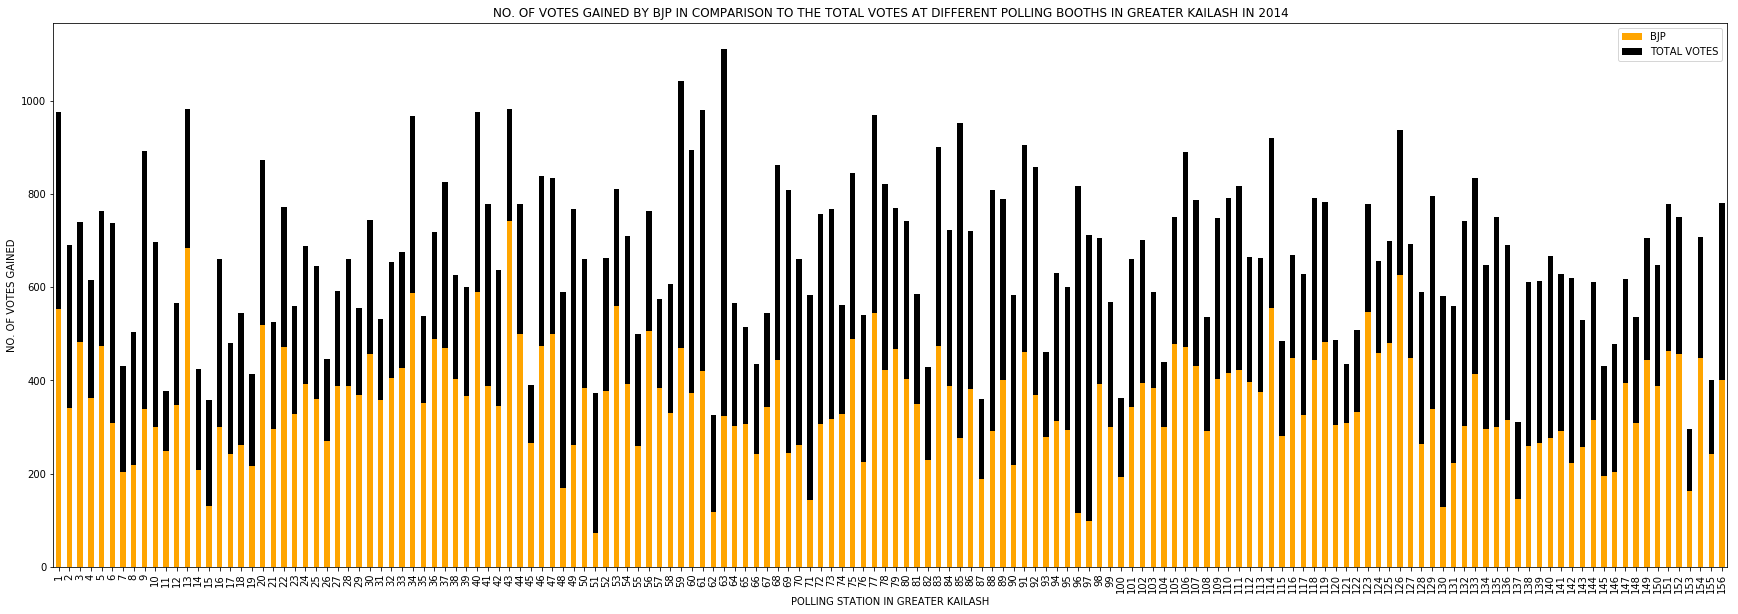

In [36]:
az= df_newa[['BJP','TOTAL VOTES','Station']]
y= az.set_index('Station')
z=y.groupby('Station').mean()
z.plot.bar(stacked=True,figsize=(30,10),color = ('orange','black'))
plt.title('NO. OF VOTES GAINED BY BJP IN COMPARISON TO THE TOTAL VOTES AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH IN 2014')
plt.xlabel('POLLING STATION IN GREATER KAILASH')
plt.ylabel('NO. OF VOTES GAINED')
plt.show()

# 2015:

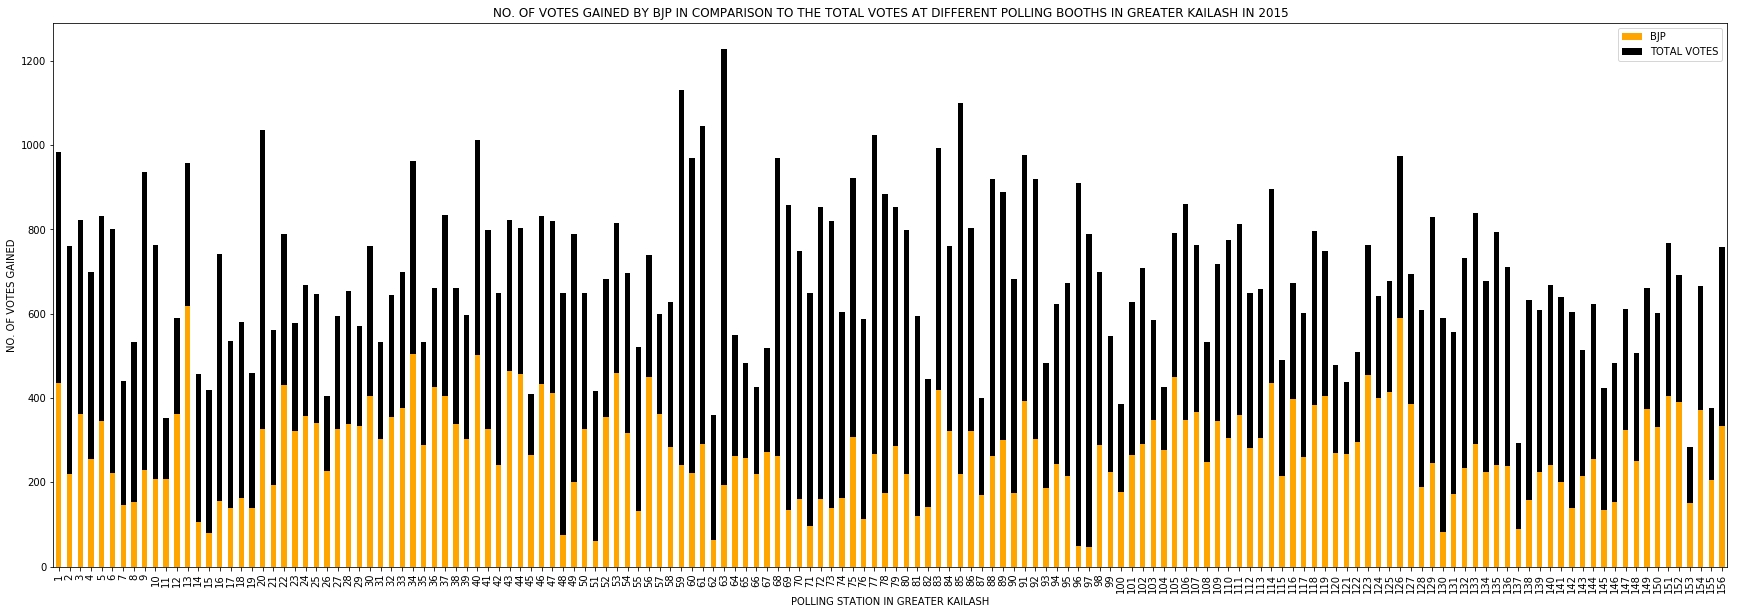

In [37]:
az= df_new1[['BJP','TOTAL VOTES','Station']]
y= az.set_index('Station')
z=y.groupby('Station').mean()
z.plot.bar(stacked=True,figsize=(30,10),color = ('orange','black'))
plt.title('NO. OF VOTES GAINED BY BJP IN COMPARISON TO THE TOTAL VOTES AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH IN 2015')
plt.xlabel('POLLING STATION IN GREATER KAILASH')
plt.ylabel('NO. OF VOTES GAINED')
plt.show()

## POLLING STATIONS WHERE BJP SECURED 50% OR MORE VOTES :

## 2013: 

In [38]:
databjp13 = data2013[['Station','BJP','valid']]
per = pd.DataFrame((databjp13['BJP'])/databjp13['valid']*100,columns=['per1'])
pernew = pd.DataFrame(per['per1']>50)
pernew['per1'].value_counts()

False    154
True       2
Name: per1, dtype: int64

## 2014:


In [39]:
databjp14 = data2014[['Station','BJP','valid']]
per3 = pd.DataFrame((databjp14['BJP'])/databjp14['valid']*100,columns=['per1'])
pernew = pd.DataFrame(per3['per1']>50)
pernew['per1'].value_counts()

True     105
False     51
Name: per1, dtype: int64

## 2015: 

In [40]:
databjp15 = data2015[['Station','BJP','valid']]
per1 = pd.DataFrame((databjp15['BJP'])/databjp15['valid']*100,columns=['per1'])
pernew1 = pd.DataFrame(per1['per1']>50)
pernew1['per1'].value_counts()

False    102
True      54
Name: per1, dtype: int64

## POLLING STATIONS WHERE BJP SECURED LESS THAN 33% OF VOTES: 

## 2013: 

In [41]:
pernew = pd.DataFrame(per['per1']<33)
pernew['per1'].value_counts()

True     93
False    63
Name: per1, dtype: int64

## 2014: 

In [42]:
pernew = pd.DataFrame(per3['per1']<33)
pernew['per1'].value_counts()

False    147
True       9
Name: per1, dtype: int64

## 2015: 

In [43]:
pernew1 = pd.DataFrame(per1['per1']<33)
pernew1['per1'].value_counts()

False    103
True      53
Name: per1, dtype: int64

## IMPROVEMENT IN BJP'S VOTE SHARE IN GREATER KAILASH(2013 VS 2015)  

In [44]:
bjpg =pd.DataFrame(df_new1['BJP']>df_new['BJP'])
bjpg['BJP'].value_counts()

True     132
False     24
Name: BJP, dtype: int64

# CHANGE IN THE VOTE COUNT OF BJP IN THE PAST FOUR ELECTIONS: 

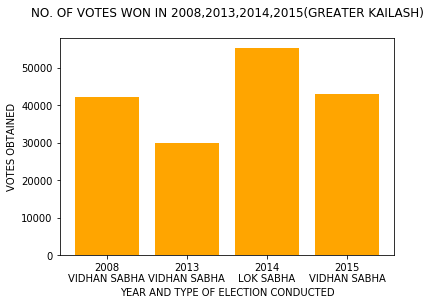

In [45]:
my_colors = ['orange']  
plt.title("NO. OF VOTES WON IN 2008,2013,2014,2015(GREATER KAILASH)\n",color='black')
plt.xlabel("YEAR AND TYPE OF ELECTION CONDUCTED",color='black')
plt.ylabel("VOTES OBTAINED",color='black')
x = ['2008\nVIDHAN SABHA','2013\nVIDHAN SABHA','2014\nLOK SABHA','2015\nVIDHAN SABHA']
y = [42197,29897,55200,42902]
plt.bar(x,y,color = my_colors)
plt.show()

## FINANCIAL DETAILS OF THE CANDIDATE :

# 2013: AJAY KUMAR MALHOTRA


## MOVABLE ASSETS: 

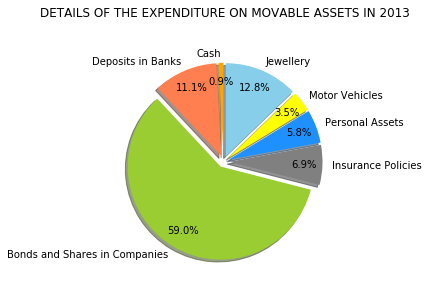

In [46]:
labels = 'Cash','Deposits in Banks','Bonds and Shares in Companies','Insurance Policies','Personal Assets','Motor Vehicles','Jewellery'
sizes = [351000, 4532000,24128880,2828018,2365000,1431000,5227000]
colors = ['orange','coral','yellowgreen','grey','dodgerblue','yellow','skyblue']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON MOVABLE ASSETS IN 2013\n\n')
plt.axis('equal')
plt.show()

# 2015: RAKESH KUMAR GULLAIYA


## MOVABLE ASSETS: 

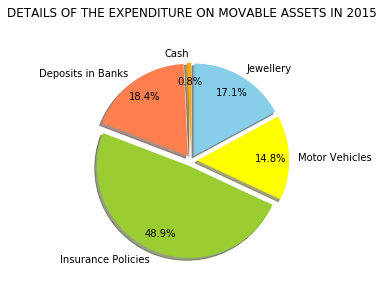

In [47]:
labels = 'Cash','Deposits in Banks','Insurance Policies','Motor Vehicles','Jewellery'
sizes = [97500,2365291,6270000,1905253,2195000]
colors = ['orange','coral','yellowgreen','yellow','skyblue','yellow','skyblue']
explode = (0.05,0.05,0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON MOVABLE ASSETS IN 2015\n\n')
plt.axis('equal')
plt.show()

## IMMOVABLE ASSETS(2013): 

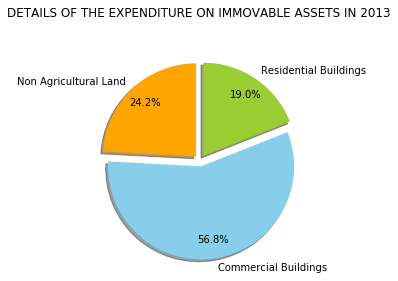

In [48]:
labels = 'Non Agricultural Land','Commercial Buildings','Residential Buildings'
sizes = [15260000, 35900000,12000000]
colors = ['orange','skyblue','yellowgreen']
explode = (0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON IMMOVABLE ASSETS IN 2013\n\n')
plt.axis('equal')
plt.show()

## IMMOVABLE ASSETS(2015): 

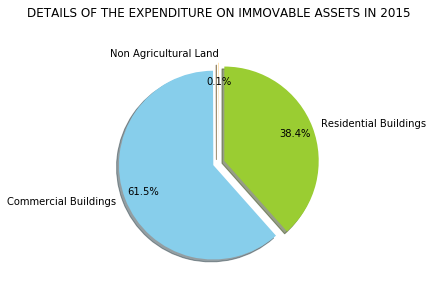

In [49]:
labels = 'Non Agricultural Land','Commercial Buildings','Residential Buildings'
sizes = [10000,12000000,7500000]
colors = ['orange','skyblue','yellowgreen']
explode = (0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON IMMOVABLE ASSETS IN 2015\n\n')
plt.axis('equal')
plt.show()

# PARTY ANALYSIS : AAM AADMI PARTY(AAP) 

## NO. OF VOTES WON AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH(2013):  

# 2013:

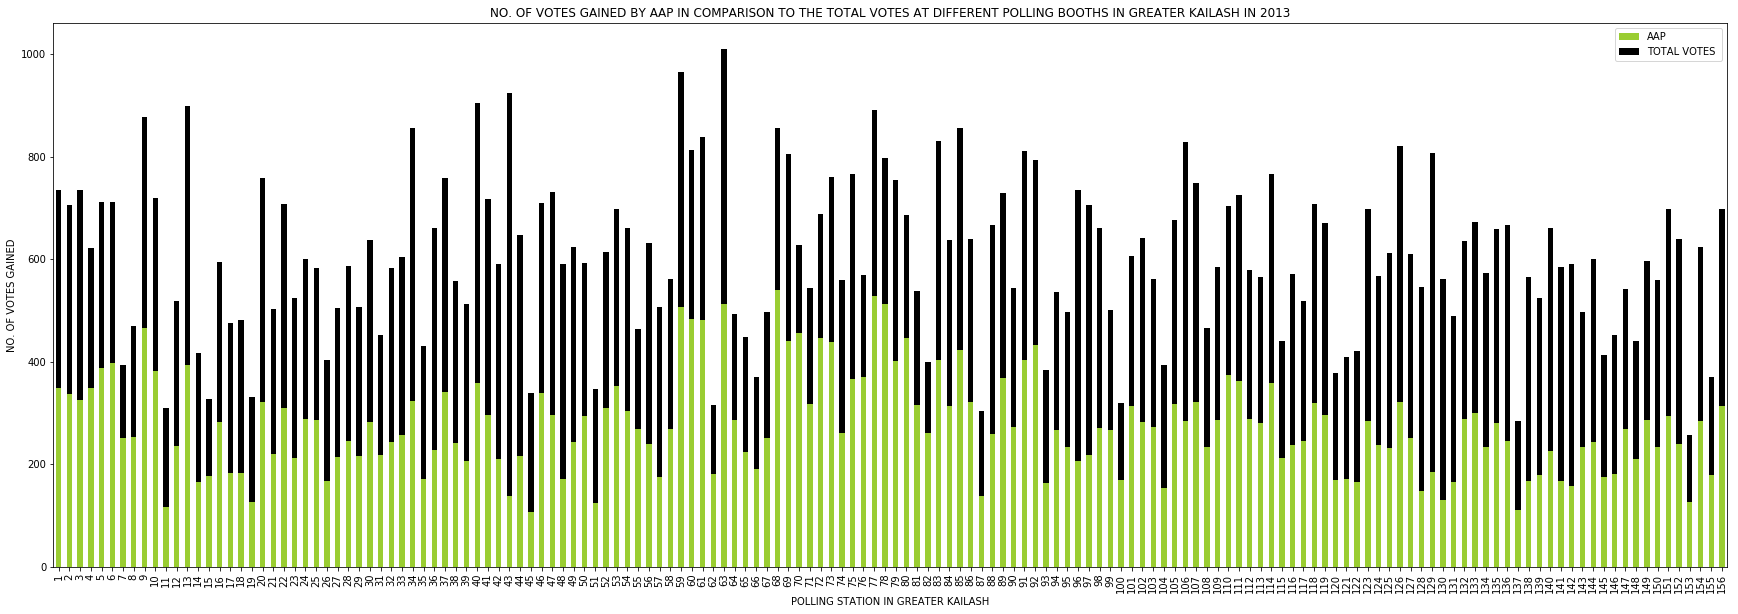

In [50]:
az= df_new[['AAP','TOTAL VOTES ','Station']]
y= az.set_index('Station')
z=y.groupby('Station').mean()
z.plot.bar(stacked=True,figsize=(30,10),color = ('yellowgreen','black'))
plt.title('NO. OF VOTES GAINED BY AAP IN COMPARISON TO THE TOTAL VOTES AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH IN 2013')
plt.xlabel('POLLING STATION IN GREATER KAILASH')
plt.ylabel('NO. OF VOTES GAINED')
plt.show()

# 2014:

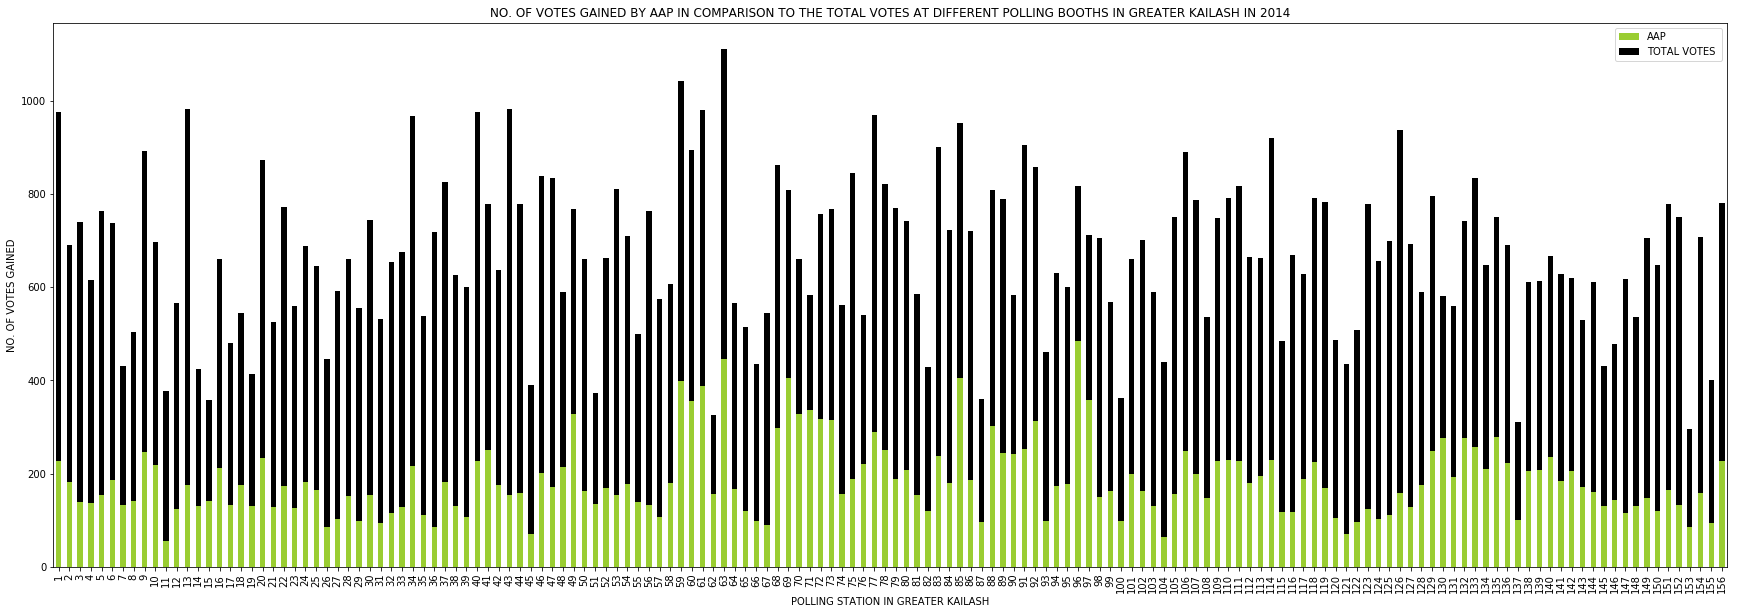

In [51]:
az= df_newa[['AAP','TOTAL VOTES ','Station']]
y= az.set_index('Station')
z=y.groupby('Station').mean()
z.plot.bar(stacked=True,figsize=(30,10),color = ('yellowgreen','black'))
plt.title('NO. OF VOTES GAINED BY AAP IN COMPARISON TO THE TOTAL VOTES AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH IN 2014')
plt.xlabel('POLLING STATION IN GREATER KAILASH')
plt.ylabel('NO. OF VOTES GAINED')
plt.show()

# 2015:

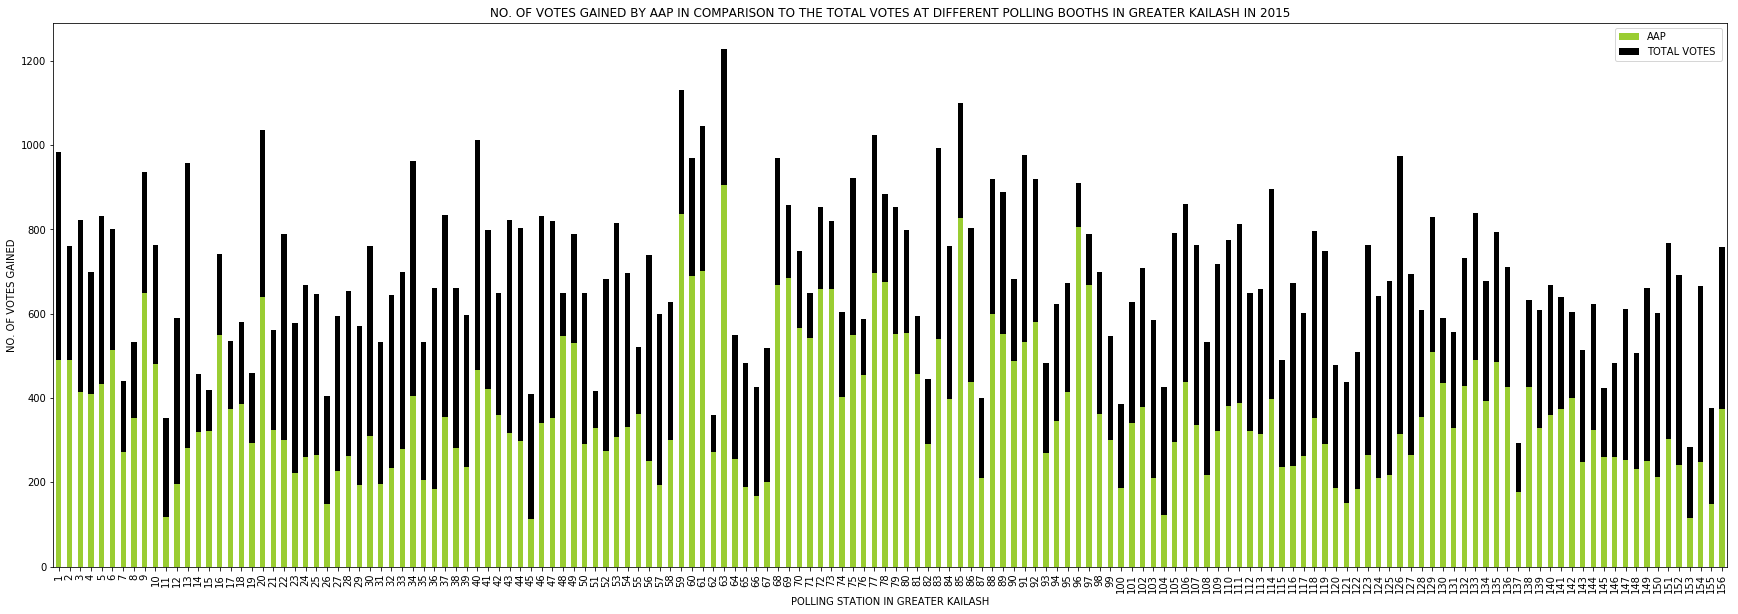

In [52]:
az= df_new1[['AAP','TOTAL VOTES ','Station']]
y= az.set_index('Station')
z=y.groupby('Station').mean()
z.plot.bar(stacked=True,figsize=(30,10),color = ('yellowgreen','black'))
plt.title('NO. OF VOTES GAINED BY AAP IN COMPARISON TO THE TOTAL VOTES AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH IN 2015')
plt.xlabel('POLLING STATION IN GREATER KAILASH')
plt.ylabel('NO. OF VOTES GAINED')
plt.show()

## NO. OF POLLING STATIONS WHERE AAP SECURED MORE THE 50% OF TOTAL VOTES: 

## 2013:

In [53]:
dataaap13 = data2013[['Station','AAP','valid']]
per = pd.DataFrame((dataaap13['AAP'])/dataaap13['valid']*100,columns=['per1'])
pernew = pd.DataFrame(per['per1']>50)
pernew['per1'].value_counts()

False    116
True      40
Name: per1, dtype: int64

## 2014: 

In [54]:
dataaap14 = data2014[['Station','AAP','valid']]
per4 = pd.DataFrame((dataaap14['AAP'])/dataaap14['valid']*100,columns=['per1'])
pernew = pd.DataFrame(per4['per1']>50)
pernew['per1'].value_counts()

False    152
True       4
Name: per1, dtype: int64

## 2015: 

In [55]:
dataaap15 = data2015[['Station','AAP','valid']]
per1 = pd.DataFrame((dataaap15['AAP'])/dataaap15['valid']*100,columns=['per1'])
pernew1 = pd.DataFrame(per1['per1']>50)
pernew1['per1'].value_counts()

True     81
False    75
Name: per1, dtype: int64

## NO.  OF POLLING STATIONS WHERE AAP SECURED LESS THAN 33% OF TOTAL VOTES: 

## 2013: 

In [56]:
pernew = pd.DataFrame(per['per1']<33)
pernew['per1'].value_counts()

False    145
True      11
Name: per1, dtype: int64

## 2014: 

In [57]:
pernew = pd.DataFrame(per4['per1']<33)
pernew['per1'].value_counts()

True     126
False     30
Name: per1, dtype: int64

## 2015: 

In [58]:
pernew1 = pd.DataFrame(per1['per1']<33)
pernew1['per1'].value_counts()

False    148
True       8
Name: per1, dtype: int64

## IMPROVEMENT IN THE VOTE SHARE OF AAP IN GREATER KAILASH(2013 VS 2015) 

In [59]:
aapg =pd.DataFrame(df_new1['AAP']>df_new['AAP'])
aapg['AAP'].value_counts()

True     122
False     34
Name: AAP, dtype: int64

# CHANGE IN THE VOTE COUNT OF AAP IN THE PAST FOUR ELECTIONS: 

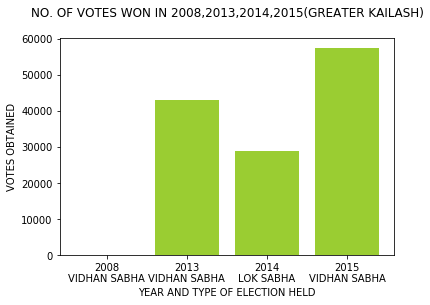

In [60]:
my_colors = ['yellowgreen']  
plt.title("NO. OF VOTES WON IN 2008,2013,2014,2015(GREATER KAILASH)\n",color='black')
plt.xlabel("YEAR AND TYPE OF ELECTION HELD",color='black')
plt.ylabel("VOTES OBTAINED",color='black')
x = ['2008\nVIDHAN SABHA','2013\nVIDHAN SABHA','2014\nLOK SABHA','2015\nVIDHAN SABHA']
y = [0,42924,28829,57430]
plt.bar(x,y,color = my_colors)
plt.show()

## FINANCIAL DETAILS OF THE CANDIDATE(AAP): 

# 2013: SAURABH BHARADWAJ

## MOVABLE ASSETS: 

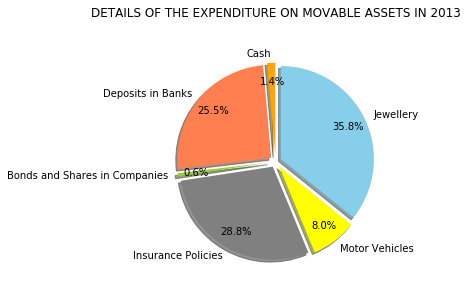

In [61]:
labels = 'Cash','Deposits in Banks','Bonds and Shares in Companies','Insurance Policies','Motor Vehicles','Jewellery'
sizes = [50000,928789,20227,1050826,290000,1304500]
colors = ['orange','coral','yellowgreen','grey','yellow','skyblue']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON MOVABLE ASSETS IN 2013\n\n')
plt.axis('equal')
plt.show()

# 2015: SAURABH BHARADWAJ

## MOVABLE ASSETS: 

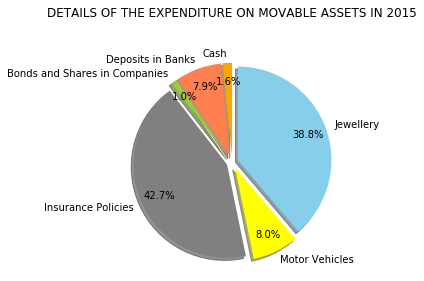

In [62]:
labels = 'Cash','Deposits in Banks','Bonds and Shares in Companies','Insurance Policies','Motor Vehicles','Jewellery'
sizes = [48000,230139,29690,1251580, 233000,1136740]
colors = ['orange','coral','yellowgreen','grey','yellow','skyblue']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON MOVABLE ASSETS IN 2015\n\n')
plt.axis('equal')
plt.show()

## IMMOVABLE ASSETS(2013): 

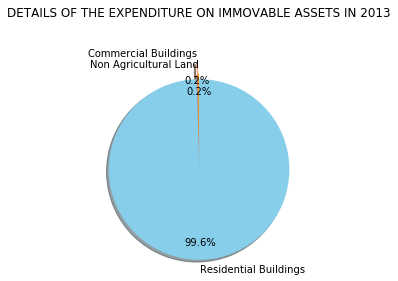

In [63]:
labels = 'Non Agricultural Land','Commercial Buildings','Residential Buildings'
sizes = [10000, 10000,5000000]
colors = ['orange','coral','skyblue']
explode = (0,0.1,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON IMMOVABLE ASSETS IN 2013\n\n')
plt.axis('equal')
plt.show()

## IMMOVABLE ASSETS(2015): 

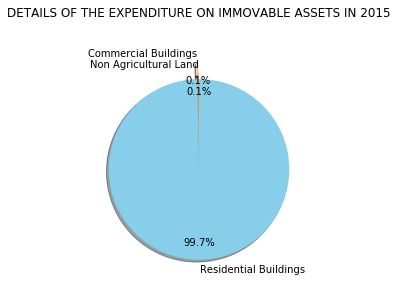

In [64]:
labels = 'Non Agricultural Land','Commercial Buildings','Residential Buildings'
sizes = [10000,10000,7300000]
colors = ['orange','coral','skyblue']
explode = (0,0.1,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON IMMOVABLE ASSETS IN 2015\n\n')
plt.axis('equal')
plt.show()

# PARTY ANALYSIS: INDIAN NATIONAL CONGRESS

##  NO. OF VOTES WON AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH:

# 2013:

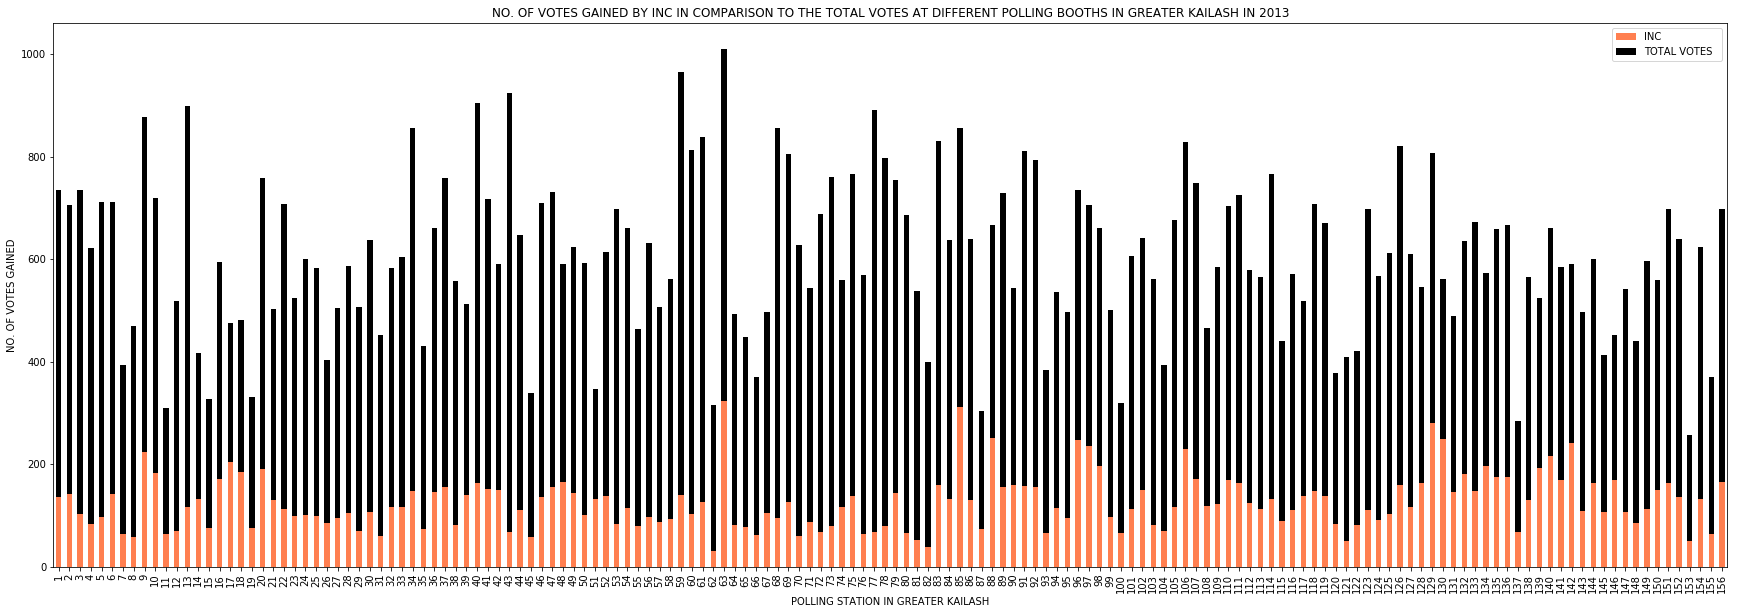

In [65]:
az= df_new[['INC','TOTAL VOTES  ','Station']]
y= az.set_index('Station')
z=y.groupby('Station').mean()
z.plot.bar(stacked=True,figsize=(30,10),color = ('coral','black'))
plt.title('NO. OF VOTES GAINED BY INC IN COMPARISON TO THE TOTAL VOTES AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH IN 2013')
plt.xlabel('POLLING STATION IN GREATER KAILASH')
plt.ylabel('NO. OF VOTES GAINED')
plt.show()

# 2014:

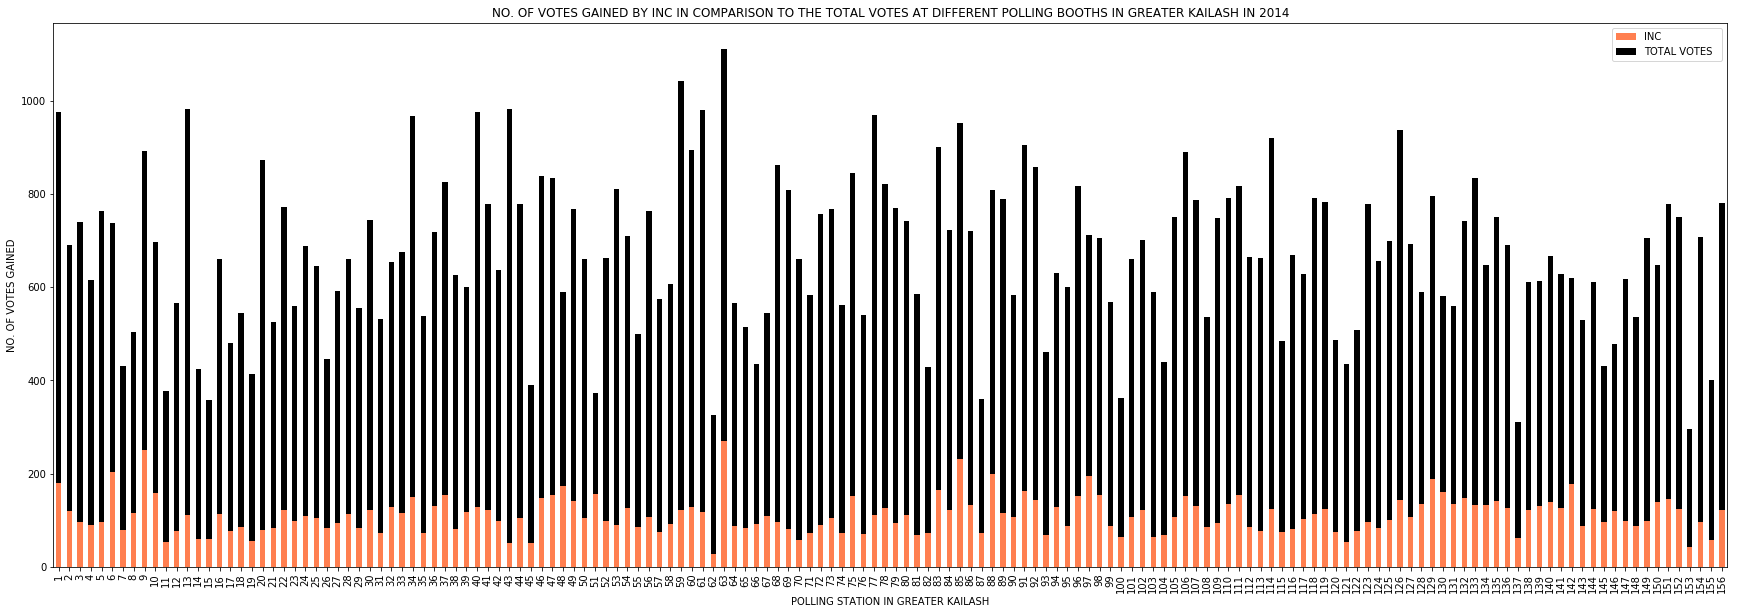

In [66]:
az= df_newa[['INC','TOTAL VOTES  ','Station']]
y= az.set_index('Station')
z=y.groupby('Station').mean()
z.plot.bar(stacked=True,figsize=(30,10),color = ('coral','black'))
plt.title('NO. OF VOTES GAINED BY INC IN COMPARISON TO THE TOTAL VOTES AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH IN 2014')
plt.xlabel('POLLING STATION IN GREATER KAILASH')
plt.ylabel('NO. OF VOTES GAINED')
plt.show()

# 2015:

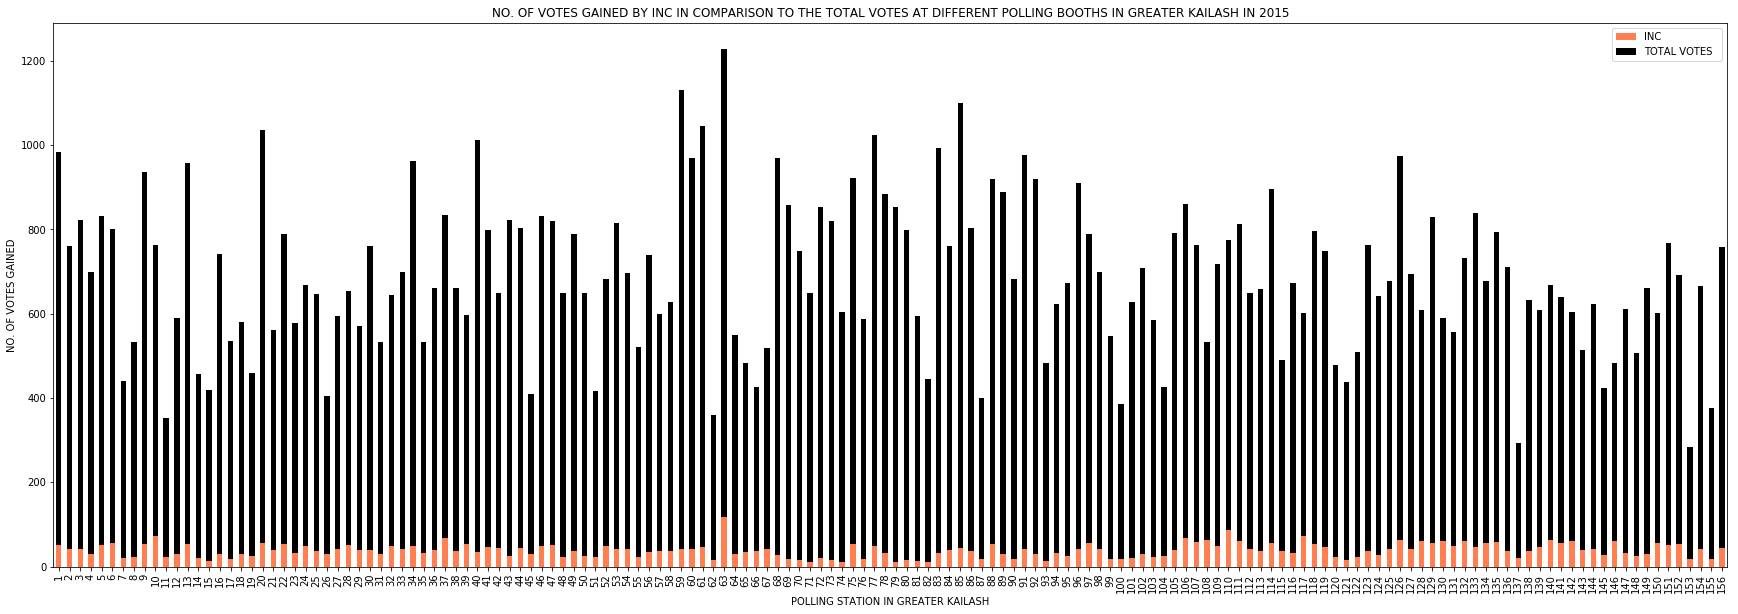

In [67]:
az= df_new1[['INC','TOTAL VOTES  ','Station']]
y= az.set_index('Station')
z=y.groupby('Station').mean()
z.plot.bar(stacked=True,figsize=(30,10),color = ('coral','black'))
plt.title('NO. OF VOTES GAINED BY INC IN COMPARISON TO THE TOTAL VOTES AT DIFFERENT POLLING BOOTHS IN GREATER KAILASH IN 2015')
plt.xlabel('POLLING STATION IN GREATER KAILASH')
plt.ylabel('NO. OF VOTES GAINED')
plt.show()

## NO. OF POLLING STATIONS WHERE INC SECURED MORE THAN 50% OF TOTAL VOTES:

## 2013: 

In [68]:
datainc13 = data2013[['Station','INC','valid']]
per = pd.DataFrame((datainc13['INC'])/datainc13['valid']*100,columns=['per1'])
pernew = pd.DataFrame(per['per1']>50)
pernew['per1'].value_counts()

False    156
Name: per1, dtype: int64

## 2014: 

In [69]:
datainc14 = data2014[['Station','INC','valid']]
per5 = pd.DataFrame((datainc14['INC'])/datainc14['valid']*100,columns=['per1'])
pernew = pd.DataFrame(per5['per1']>50)
pernew['per1'].value_counts()

False    156
Name: per1, dtype: int64

## 2015: 

In [70]:
datainc15 = data2015[['Station','INC','valid']]
per = pd.DataFrame((datainc15['INC'])/datainc15['valid']*100,columns=['per1'])
pernew = pd.DataFrame(per['per1']>50)
pernew['per1'].value_counts()

False    156
Name: per1, dtype: int64

## NO. OF POLLING STATIONS WHERE INC SECURED LESS THAN 33% OF TOTAL VOTES(2013): 

## 2013: 

In [71]:
pernew = pd.DataFrame(per['per1']<33 )
pernew['per1'].value_counts()

True    156
Name: per1, dtype: int64

## 2014: 

In [72]:
pernew = pd.DataFrame(per5['per1']<33 )
pernew['per1'].value_counts()

True     155
False      1
Name: per1, dtype: int64

## 2015: 

In [73]:
pernew1 = pd.DataFrame(per1['per1']<33 )
pernew1['per1'].value_counts()

False    148
True       8
Name: per1, dtype: int64

## IMPROVEMENT IN THE VOTE SHARE OF INC IN GREATER KAILASH(2013 VS 2015) 

In [74]:
incg =pd.DataFrame(df_new1['INC']>df_new['INC'])
incg['INC'].value_counts()

False    156
Name: INC, dtype: int64

# CHANGE IN THE VOTE COUNT OF INC IN THE PAST FOUR ELECTIONS:

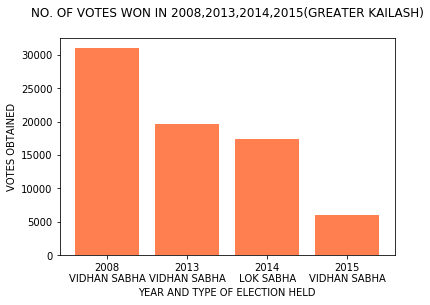

In [75]:
my_colors = ['coral']  
plt.title("NO. OF VOTES WON IN 2008,2013,2014,2015(GREATER KAILASH)\n",color='black')
plt.xlabel("YEAR AND TYPE OF ELECTION HELD",color='black')
plt.ylabel("VOTES OBTAINED",color='black')
x = ['2008\nVIDHAN SABHA','2013\nVIDHAN SABHA','2014\nLOK SABHA','2015\nVIDHAN SABHA']
y = [30979,19641,17312,6072]
plt.bar(x,y,color = my_colors)
plt.show()

##  FINANCIAL DETAILS OF THE CANDIDATE:  

# 2013 : VIRENDER KASANA

## MOVABLE ASSETS: 

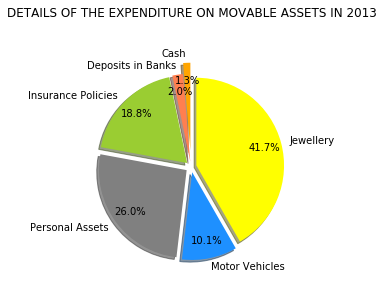

In [76]:
labels = 'Cash','Deposits in Banks','Insurance Policies','Personal Assets','Motor Vehicles','Jewellery'
sizes = [143000,212979,2044000,2828018,1100884,4530000]
colors = ['orange','coral','yellowgreen','grey','dodgerblue','yellow']
explode = (0.15,0.05,0.05,0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON MOVABLE ASSETS IN 2013\n\n')
plt.axis('equal')
plt.show()

# 2015 : SHARMISTHA MUKHERJEE

## MOVABLE ASSETS: 

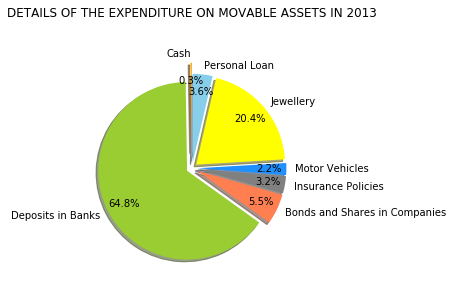

In [77]:
labels = 'Cash','Deposits in Banks','Bonds and Shares in Companies','Insurance Policies','Motor Vehicles','Jewellery','Personal Loan'
sizes = [46720,11657026,991456,567687,392000,3675675,649037]
colors = ['orange','yellowgreen','coral','grey','dodgerblue','yellow','skyblue']
explode = (0.15,0.05,0.05,0.05,0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON MOVABLE ASSETS IN 2013\n\n')
plt.axis('equal')
plt.show()

## IMMOVABLE ASSETS(2013): 

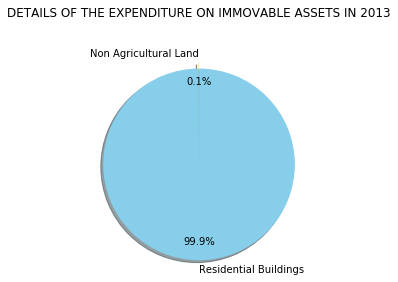

In [78]:
labels = 'Non Agricultural Land','Residential Buildings'
sizes = [10000,17000000]
colors = ['orange','skyblue']
explode = (0,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON IMMOVABLE ASSETS IN 2013\n\n')
plt.axis('equal')
plt.show()

## IMMOVABLE ASSETS(2015): 

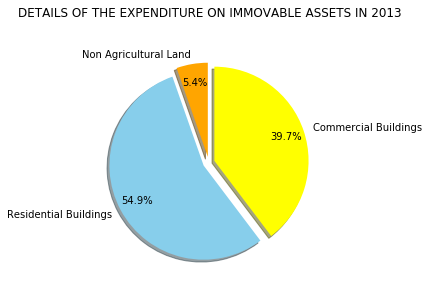

In [79]:
labels = 'Non Agricultural Land','Residential Buildings','Commercial Buildings'
sizes = [600000,6132000,4432000]
colors = ['orange','skyblue','yellow']
explode = (0.05,.05,.05)  # explode 1st slice

#Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('DETAILS OF THE EXPENDITURE ON IMMOVABLE ASSETS IN 2013\n\n')
plt.axis('equal')
plt.show()

# PREDICTING THE RESULT OF 2020 DELHI LEGISLATIVE ASSEMBLY ELECTION IN GREATER KAILASH:

In [80]:
data2013.head()
data1 = data2013[['Station','WINNER']]
data1.head()

,Station,WINNER
0,1,AAP
1,2,AAP
2,3,AAP
3,4,AAP
4,5,AAP


In [81]:
data2015.head()
data2 = data2015[['Station','Winner']]
data2.rename(columns={'Winner':'WINNER'},inplace=True)
datanew = pd.DataFrame(data2015['Station'])
data2.head()

,Station,WINNER
0,1,AAP
1,2,AAP
2,3,AAP
3,4,AAP
4,5,AAP


In [82]:
add  = pd.DataFrame([['157','AAP'],['158','AAP'],['159','AAP'],['160','BJP'],['161','BJP'],
                    ['162','BJP'],['163','BJP']],columns=('Station','WINNER'))

In [83]:
datafinal = pd.concat([data1,data2,add])

In [84]:
datafinal.head()
#datafinal['WINNER']=datafinal['WINNER'].replace({'AAP':int('1'),'BJP':int('2'),'INC':int('3')})

,Station,WINNER
0,1,AAP
1,2,AAP
2,3,AAP
3,4,AAP
4,5,AAP


In [85]:
datafinal.head()
datafinal['WINNER'].value_counts()

AAP    220
BJP     91
INC      8
Name: WINNER, dtype: int64

In [86]:
add1  = pd.DataFrame(['157','158','159','160','161',
                    '162','163'],columns=['Station'])
datanew = pd.concat([datanew,add1])
datanew['Station'].count()

163

In [87]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
scoring='accuracy'

In [108]:
X = datafinal.drop('WINNER',axis=1)
y = datafinal['WINNER']
validation_size = 0.33
seed =7
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = validation_size,random_state =seed)

In [109]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = validation_size,random_state =seed)
models=[]
#models.append(('LOGISTIC REG',LogisticRegression()))
#models.append(('LDA',LinearDiscriminantAnalysis(n_components = 2)))
models.append(('KNN',KNeighborsClassifier(n_neighbors=2)))
#models.append(('DECISION TREE',DecisionTreeClassifier()))
#models.append(('RANDOM FOREST',RandomForestClassifier()))
#models.append(('NAIVE BAYES',GaussianNB()))
#models.append(('SVM',SVC()))
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10, random_state=seed)
    cv_results= model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print('------------------------------------------')
    print(name,i)
    print('------------------------------------------')
    print('TRAINING SET SIZE',len(X_train))
    print('TESTING SET SIZE',len(X_test))
    print('------------------------------------------')
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print('CROSS VALIDATION ACCURACY:',msg)
    print("TESTING ACCURACY",model.score(X_test,Y_test))
    print("TRAINING ACCURACY",model.score(X_train,Y_train))
    print('------------------------------------------')
    from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
    print ('\n clasification report:\n', classification_report(Y_test,y_pred))
    print ('\n confusion matrix:\n',confusion_matrix(Y_test, y_pred))
    y_pred = model.predict(X_test)
    count = (Y_test !=y_pred).sum()
    print("FALSE VALUES",count)
    print('------------------------------------------')
    x_tra = datanew
    pred1 = model.predict(x_tra)
    pred1 = pd.DataFrame(pred1,columns=['data'])
    print("NEW DATA",'\n',pred1['data'].value_counts())
    

------------------------------------------
KNN 0.33
------------------------------------------
TRAINING SET SIZE 213
TESTING SET SIZE 106
------------------------------------------
CROSS VALIDATION ACCURACY: KNN: 0.661255 (0.123332)
TESTING ACCURACY 0.7735849056603774
TRAINING ACCURACY 0.8215962441314554
------------------------------------------

 clasification report:
               precision    recall  f1-score   support

         AAP       0.79      0.95      0.86        79
         BJP       0.70      0.30      0.42        23
         INC       0.00      0.00      0.00         4

   micro avg       0.77      0.77      0.77       106
   macro avg       0.50      0.42      0.43       106
weighted avg       0.74      0.77      0.73       106


 confusion matrix:
 [[75  3  1]
 [16  7  0]
 [ 4  0  0]]
FALSE VALUES 24
------------------------------------------
NEW DATA 
 AAP    139
BJP     23
INC      1
Name: data, dtype: int64


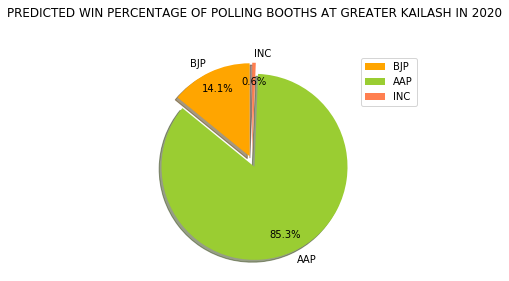

In [110]:
labels = 'BJP','AAP','INC'
sizes = [23,139,1]
colors = ['orange','yellowgreen','coral']
explode = (0.05,0.05,0.05)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels =labels ,colors=colors,
autopct='%0.1f%%', shadow=True, startangle=90,pctdistance=0.8,radius =0.8)
plt.title('PREDICTED WIN PERCENTAGE OF POLLING BOOTHS AT GREATER KAILASH IN 2020\n\n')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

<BarContainer object of 3 artists>

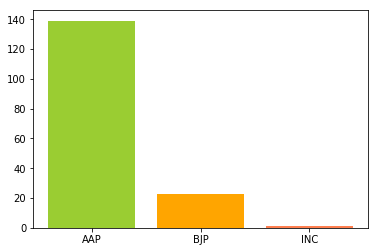

In [111]:
bars = ('AAP','BJP','INC')
height = [139,23,1]
plt.bar(bars, height,color =['yellowgreen','orange','coral'])